# 言語処理100本ノック　第4章 形態素解析

## 30. 形態素解析結果の読み込み  
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [1]:
!wget https://nlp100.github.io/data/neko.txt

--2021-05-26 05:43:12--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.04s   

2021-05-26 05:43:12 (23.9 MB/s) - ‘neko.txt’ saved [975789/975789]



In [2]:
# 形態素分析ライブラリーMeCab と 辞書(mecab-ipadic-NEologd)のインストール 
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [3]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [4]:
!head -18 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ


In [5]:
filename = "./neko.txt.mecab"
sentences = []
ans = []

with open(filename,"r") as f:
  for line in f:
    if line != "EOS\n": # 文末以外を追加
        fields = line.split('\t')
        if len(fields) != 2 or fields[0] == '':  # 文頭以外の空白と改行文字はスキップ
          continue
        else:
          word_dic = {"surface":fields[0], "base":fields[1].split(',')[6], "pos":fields[1].split(',')[0], "pos1":fields[1].split(',')[1] }
          ans.append(word_dic)
    else:
        sentences.append(ans)
        ans = []


In [6]:
for i in range(5):
  print(sentences[i])

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}]
[]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[]


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [7]:
verbs = []
for sentence in sentences:
  for word in sentence:
    if '動詞' == (word['pos']) :
      verbs.append(word["surface"])
print("重複有りの場合, 動詞の数 = {}".format(len(verbs)))

重複有りの場合, 動詞の数 = 28906


In [8]:
verbs = list(set(verbs))
print("重複無しの場合, 動詞の数 = {}\n例を以下に示す\n".format(len(verbs)))
for i in range(10):
  print(verbs[i])

重複無しの場合, 動詞の数 = 3893
例を以下に示す

にたて
放つ
呼び立て
構う
やむ
引け
捕まっ
始め
直す
仰せつけ


## 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．

In [9]:
verbs_base = []
for sentence in sentences:
  for word in sentence:
    if '動詞' == (word['pos']) :
      verbs_base.append(word["base"])
print("重複有りの場合, 動詞(基本形)の数 = {}".format(len(verbs_base)))

重複有りの場合, 動詞(基本形)の数 = 28906


In [10]:
verbs_base = list(set(verbs_base))
print("重複無しの場合, 動詞(基本形)の数 = {}\n例を以下に示す\n".format(len(verbs_base)))
for i in range(10):
  print(verbs_base[i])

重複無しの場合, 動詞(基本形)の数 = 2300
例を以下に示す

小突く
放つ
構う
差す
やむ
あげる
厭く
おどろかす
直す
刈る


## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ

In [11]:
nouns = []
for sentence in sentences:
  for i in range(len(sentence)):
    if i+2 >= len(sentence):
      break
    if '名詞' == (sentence[i]["pos"]) and '助詞' == (sentence[i+1]['pos']) and 'の' == (sentence[i+1]['surface'])  and '名詞' == (sentence[i+2]['pos'])  :
      nouns.append(sentence[i]["surface"] + sentence[i+1]["surface"] + sentence[i+2]["surface"])

print("重複有りの場合, 「の」で連結されている名詞句の数 = {}".format(len(nouns)))

重複有りの場合, 「の」で連結されている名詞句の数 = 6044


In [12]:
verbs_base = list(set(verbs_base))
print("重複無しの場合,「の」で連結されている名詞句の数 = {}\n例を以下に示す\n".format(len(nouns)))
for i in range(10):
  print(nouns[i])

重複無しの場合,「の」で連結されている名詞句の数 = 6044
例を以下に示す

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
掌の裏
何の事
肝心の母親


## 34.  名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [13]:
nouns_long = []
max_noun=""
max=2

for sentence in sentences:
  n=0
  nouns = ""
  for i in range(len(sentence)):
    if '名詞' == (sentence[i]["pos"]): ##名詞のとき
      nouns = ''.join([nouns,sentence[i]["surface"]])
      n += 1
    elif n>=2: ##以下,名詞以外のとき
      nouns_long.append(nouns)
      if max<n:
        max = n
        max_noun=nouns
      n=0
      nouns=""
      
    else:
      n=0
      nouns=""
  if n>=2:
    nouns_long.append(nouns)


print("重複有りの場合, 連接名詞の数 = {}".format(len(nouns_long)))
for n in nouns_long[:10]:
  print(n)

重複有りの場合, 連接名詞の数 = 7338
人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外


In [14]:
nouns_long = list(set(nouns_long))
print("重複無しの場合,連接名詞の数 = {}\n例を以下に示す\n".format(len(nouns_long)))
for i in range(10):
  print(nouns_long[i])

重複無しの場合,連接名詞の数 = 4457
例を以下に示す

八時半頃
君代さん
直径一寸
もっとも集
なあに二三行
ため逆上
先生そこ
儘卓上
吾等猫族
当人自身


In [15]:
nouns_long = sorted(nouns_long, reverse=True)

## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [16]:
words_list = []
for sentence in sentences:
  for word in sentence:
      words_list.append(word["base"])
print("重複有りの場合, 単語の数 = {}".format(len(words_list)))

重複有りの場合, 単語の数 = 206338


In [17]:
import collections
c = collections.Counter(words_list)

In [18]:
type(c)

collections.Counter

In [19]:
c =  sorted(c.items(), key=lambda x: -x[1])

## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [20]:
pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 8.5MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=5046954f6a7975186cc7e5c0143d7b30af0885bf1ea850a1a0704e22d0c582bc
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [21]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [22]:
x =[] 
y = []
for i in range(10):
  x.append(c[i][0])
  y.append(c[i][1])
  print(c[i])

('の', 9194)
('。', 7486)
('て', 6848)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)


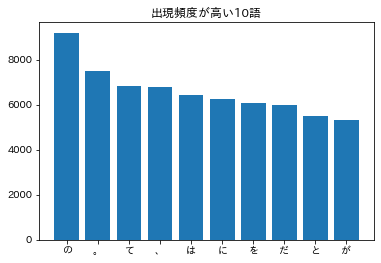

In [23]:
plt.bar(x,y)
plt.title("出現頻度が高い10語")
plt.show()

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ

In [24]:
neko_list = []
for sentence in sentences:
  for i in range(len(sentence)):
     if '猫' == (sentence[i]['surface']):
      neko_list.append(sentence[i+1]["base"])

print("重複有りの場合, 「猫」とよく共起する単語の数 = {}".format(len(neko_list)))

重複有りの場合, 「猫」とよく共起する単語の数 = 248


In [25]:
neko_cnt = collections.Counter(neko_list)
neko_cnt =  sorted(neko_cnt.items(), key=lambda x: -x[1])

In [26]:
x =[] 
y = []
for i in range(10):
  x.append(neko_cnt[i][0])
  y.append(neko_cnt[i][1])
  print(neko_cnt[i])

('の', 46)
('だ', 33)
('と', 21)
('に', 20)
('が', 20)
('で', 9)
('は', 9)
('を', 8)
('だって', 7)
('など', 7)


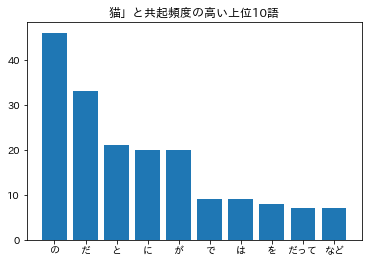

In [27]:
plt.bar(x,y)
plt.title("猫」と共起頻度の高い上位10語")
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

In [47]:
from collections import defaultdict
words_dict = defaultdict(int)
for sentence in sentences:
  for word in sentence:
      words_dict[word["base"]] += 1
print("重複有りの場合, 単語の数 = {}".format(len(words_dict)))

重複有りの場合, 単語の数 = 11251


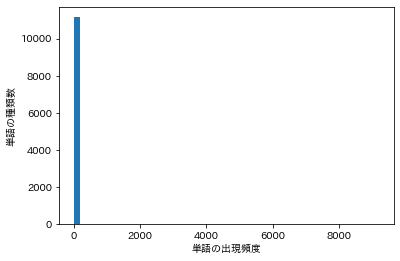

In [48]:
plt.hist(words_dict.values(), bins=50)
plt.xlabel('単語の出現頻度')
plt.ylabel('単語の種類数')
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ

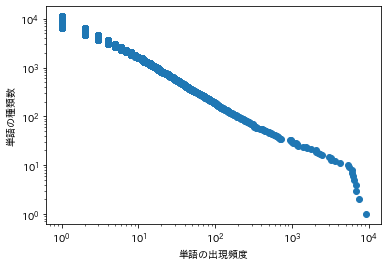

In [49]:
words_dict = sorted(words_dict.items(), key=lambda x: x[1], reverse=True)
y = [i+1 for i in range(len(words_dict))]
x = [i[1] for i in words_dict]
plt.scatter(x,y)
ax = plt.gca()
ax.set_yscale('log') 
ax.set_xscale('log')
plt.xlabel('単語の出現頻度')
plt.ylabel('単語の種類数')
plt.show()

2021/05/26追記：**離散的なデータなので、点でプロットしたほうが良い。**